# Courbe d'apprentissage

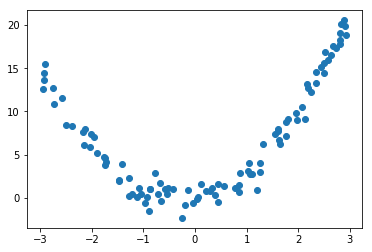

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Etape 1: generer les datas: 
a=100
x=6 * np.random.rand(a,1) - 3
y= 2* x * x + x + np.random.randn(a,1)

plt.scatter(x,y)

In [26]:
from sklearn.metrics import mean_squared_error  #MSE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def plot_learning_curves(model, X,y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
    train_errors, val_errors = [],[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict=model.predict(X_train[:m]) # train Y^
        y_val_predict=model.predict(X_val)        # Validation Y^
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_val))
    plt.plot(np.sqrt(train_errors),"r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors),"b-", linewidth=3, label="val")

# Modele sous-ajuste: 

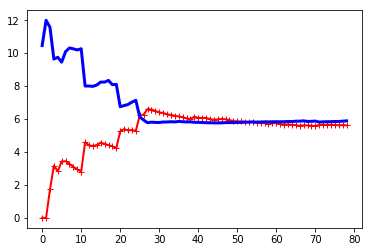

In [27]:
#appliquons la regression Lineare: 

lin_reg=LinearRegression()
plot_learning_curves(lin_reg,x,y)

le modele a partir de 10 observations ne peut plus bien les ajuster, a cause du bruit & et qu'il n'est pas Lineaire.Pour le modele de validation,il s'ameliore pour qu'en fin l'erreur s'aplatisse bien que les observations progressent.Les 2 courbes sont proches et relativement hautes et atteignent un plateau.Le MODELE de regression lineaire SOUS-AJUSTE les datas.
Solution: 
1) Choisir un modele plus complexe.
2) Trouver de meilleures variables.

# Modele sur-ajuste:

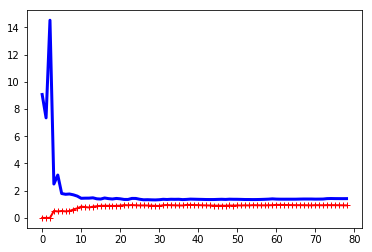

In [32]:
# Appliquons la regression polynomiale:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polynomial_regression=Pipeline([("poly_features",PolynomialFeatures(degree=2,include_bias=False)),
                                ("lin_reg",LinearRegression()),])
plot_learning_curves(polynomial_regression,x,y)

L'erreur sur les donnees d'entrainement sont inferieurs a ceux du modele de Regression Lineaire.
le modele donnent des resultats nettement meilleurs sur les donnees d'entrainement que sur ceux de la validation
on est en presence d'un modele qui sur-ajuste. 
Solution: 1) Ajouter d'avantage d'obsevations jusqu'a ce que l'erreur de validation se rapproche de celle d'entrainement.

## ++ Complexite d'un modele >> ++ variance >> -- biais

## -- Complexite d'un modele >> -- variance >> ++ biais 